# Data Science 2 - ESEO DSMT 
## Principal Components Analysis (PCA)
### 23 Nov 2021  -- Prof. R. LONGO

1. PCA Algorithm (From Linear Algebra)
2. Principal Component Analysis with scikit-learn
3. Data Visualization
4. Dimension Reduction (Pixel Data)
5. Dimension Reduction (Sequential Data or Time Series Analysis)

#### 1. PCA Algorithm (From Linear Algebra)

Given a Data Base $X_{N*d}$ we want to calculate: 
Xpca = PCA(X)
1. The first step is to calculate the mean values of each column
$M = mean(X)$
2. Next, we need to center the values in each column by subtracting the mean column value.
C = X − M 
3. The next step is to estimate the covariance matrix of the centered matrix C. 
\
$\hat{\Sigma}_{d*d} = cov(C)$

4. Finally, we calculate the eigendecomposition  of the covariance matrix $\hat{\Sigma}_{d*d}$. This results in a list of eigenvalues $\lambda$ and a list of eigenvectors $V_{d*d}$.
\
   $\lambda, V = eig(\hat{\Sigma}) $
   \
Ideally, we would select k eigenvectors called Principal Components, that have the k largest eigenvalues and store them in a matrix $W$.Once chosen, data can be projected into the Principal Components subspace via matrix multiplication:
 $Xpca _{N*k} = C_{N*d}.W_{d*k}$

In [103]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
%matplotlib notebook

<IPython.core.display.Javascript object>


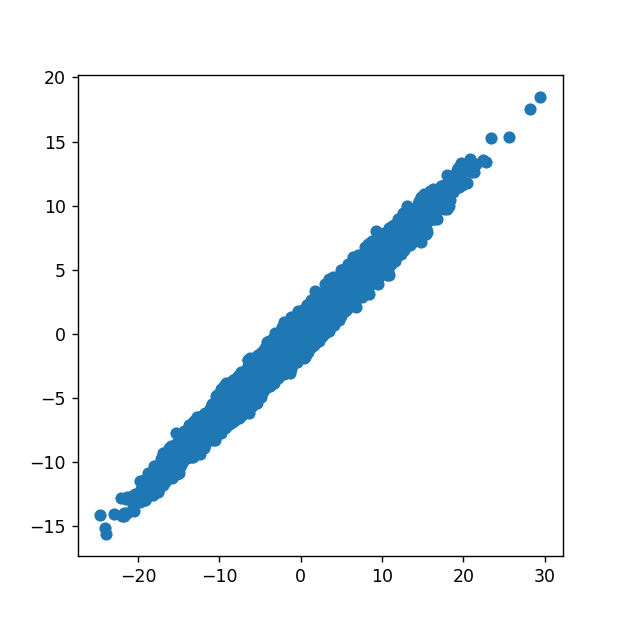

(20000, 2)


In [106]:
# First generate some data
mu = np.array([0,0])
seed =0
np.random.seed(seed=seed)

Sigma = np.array([[ 40,  25],
       [ 25,  16]])
X = np.random.multivariate_normal(mu,Sigma,20000)
fig = plt.figure(figsize=[5,5])
plt.scatter(X[:,0],X[:,1]);
print(X.shape)

In [4]:
# Step 1 and 2
M = np.mean(X,axis=0)
print(M.shape)
C = X-M

(2,)


In [5]:
sigma_hat = cov(C,rowvar=False)

In [6]:
#step 4 
lamb, V = np.linalg.eig(sigma_hat)
print("Eigen Value :",lamb)
print("Eigen Vector :\n",V)

Eigen Value : [55.69393413  0.26578852]
Eigen Vector :
 [[ 0.84684208 -0.53184443]
 [ 0.53184443  0.84684208]]


In [7]:
v1 = V[:,0].reshape(-1,1)
v2 = V[:,1].reshape(-1,1)

print("Vecteurs orthogonaux? ","Vrai" if v1.T.dot(v2)==0 else "Faux")
print("Vecteurs orthogonaux? ","Vrai" if v2.T.dot(v1)==0 else "Faux")

Vecteurs orthogonaux?  Vrai
Vecteurs orthogonaux?  Vrai


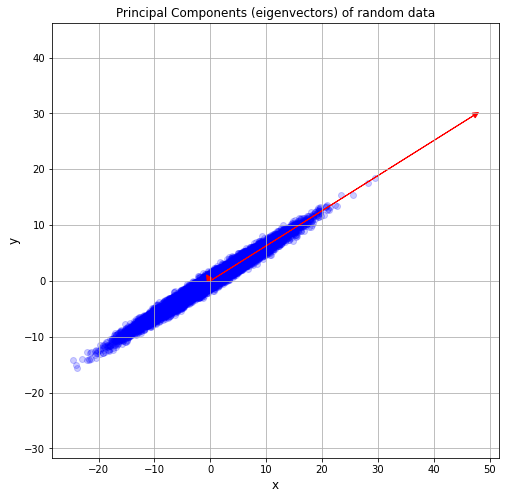

In [8]:
# first plot the eigenvectors
ah=1 # size of arrow head

 

plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c='b',alpha=0.2)
plt.axis('equal')
plt.grid()
plt.title('Principal Components (eigenvectors) of random data', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

 

plt.arrow(0,0,v1[0][0]*(lamb[0]),v1[1][0]*(lamb[0]),color='r',head_width=ah,head_length=ah)
plt.arrow(0,0,v2[0][0]*(lamb[1]),v2[1][0]*(lamb[1]),color='r',head_width=ah,head_length=ah)

Text(0, 0.5, 'PC2')

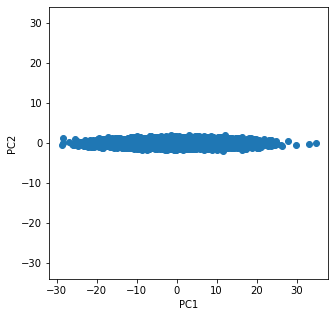

In [9]:
# step 4 (encore)
W = V 
Xpca = np.dot(C,W)
Xpca.shape
plt.figure(figsize=(5,5))
plt.axis("equal")
plt.plot(Xpca[:,0],Xpca[:,1],'o')
plt.xlabel("PC1")
plt.ylabel("PC2")

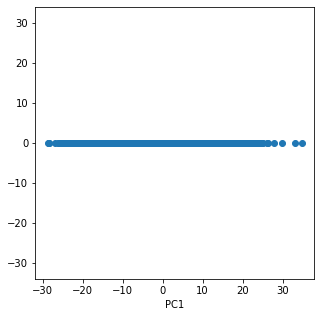

In [10]:
#dimension reduction
W = V[:,0]
Xpca = np.dot(C,W)

plt.figure(figsize=(5,5))
plt.axis('equal')
plt.plot(Xpca,np.zeros([len(Xpca)]),'o');
plt.xlabel('PC1');

 #### 2. Principal Component Analysis with scikit-learn


In [11]:
from sklearn.decomposition import PCA

In [12]:
model = PCA()

In [13]:
Xpca = model.fit_transform(C)

In [14]:
print(model.components_.T)

[[ 0.84684208 -0.53184443]
 [ 0.53184443  0.84684208]]


In [15]:
print(model.explained_variance_)


[55.69393413  0.26578852]


In [16]:
## Attention: Normalement on standardise les données avant d'appliquer la PCA (mu = 0 et Sigma = 1)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [18]:
preprocessor = make_pipeline(StandardScaler(), PCA())
Xpca = preprocessor.fit_transform(X)


In [19]:
print(preprocessor[1].explained_variance_)
print(preprocessor[1].components_.T)

[1.98843064 0.01166937]
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


#### 3. Data Visualization

In [20]:
from sklearn.datasets import load_digits

In [21]:
digits = load_digits()
X = digits.data
y = digits.target

In [22]:
model = PCA(n_components = 2)
Xpca = model.fit_transform(X)
Xpca.shape

(1797, 2)

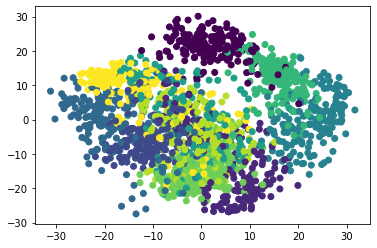

In [23]:
plt.scatter(Xpca[:,0],Xpca[:,1],c=y)


#### 4. Dimension Reduction 

In [24]:
model = PCA(n_components = 64)
Xpca= model.fit_transform(X)

In [25]:
model.explained_variance_ratio_;

Text(0, 0.5, 'Info %')

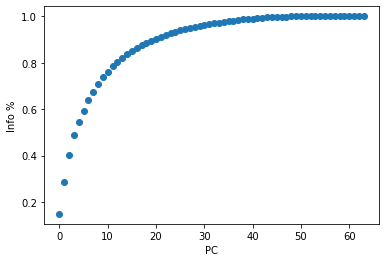

In [26]:
plt.plot(np.cumsum(model.explained_variance_ratio_),'o')
plt.xlabel("PC")
plt.ylabel("Info %")

##### 4. 1 Fast method

In [62]:
var = 0.99
model = PCA(n_components=var)
Xpca = model.fit_transform(X)

In [68]:
Xpca.shape #41 components
model.n_components_ #41 components

41

#### 5. Dimension Reduction (Sequential Data or Time Series Analysis)

In [28]:
import scipy.io as scio

In [30]:
Xsim_data = scio.loadmat(r"DataLinearSlope.mat")
Xsim_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Nov 28 20:16:31 2021',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-1.92014911e+00,  6.97155491e-01, -2.02236259e-01, ...,
         -6.57544820e-01,  2.90534445e+00, -1.05341705e-01],
        [-1.92014911e+00,  6.98155491e-01, -2.00236259e-01, ...,
         -1.60544820e-01,  3.40334445e+00,  3.93658295e-01],
        [-1.92014911e+00,  6.99155491e-01, -1.98236259e-01, ...,
          3.36455180e-01,  3.90134445e+00,  8.92658295e-01],
        ...,
        [-1.92014911e+00,  1.69515549e+00,  1.79376374e+00, ...,
          4.95348455e+02,  4.99909344e+02,  4.97896658e+02],
        [-1.92014911e+00,  1.69615549e+00,  1.79576374e+00, ...,
          4.95845455e+02,  5.00407344e+02,  4.98395658e+02],
        [-1.92014911e+00,  1.69715549e+00,  1.79776374e+00, ...,
          4.96342455e+02,  5.00905344e+02,  4.98894658e+02]]),
 'target': array([[  1. ],
        [  1.5],
        [  2. ],
        ...,
        [50

In [33]:
X = Xsim_data['X']
y = Xsim_data['target']

In [35]:
print("Shape X:",X.shape)

Shape X: (1001, 500)


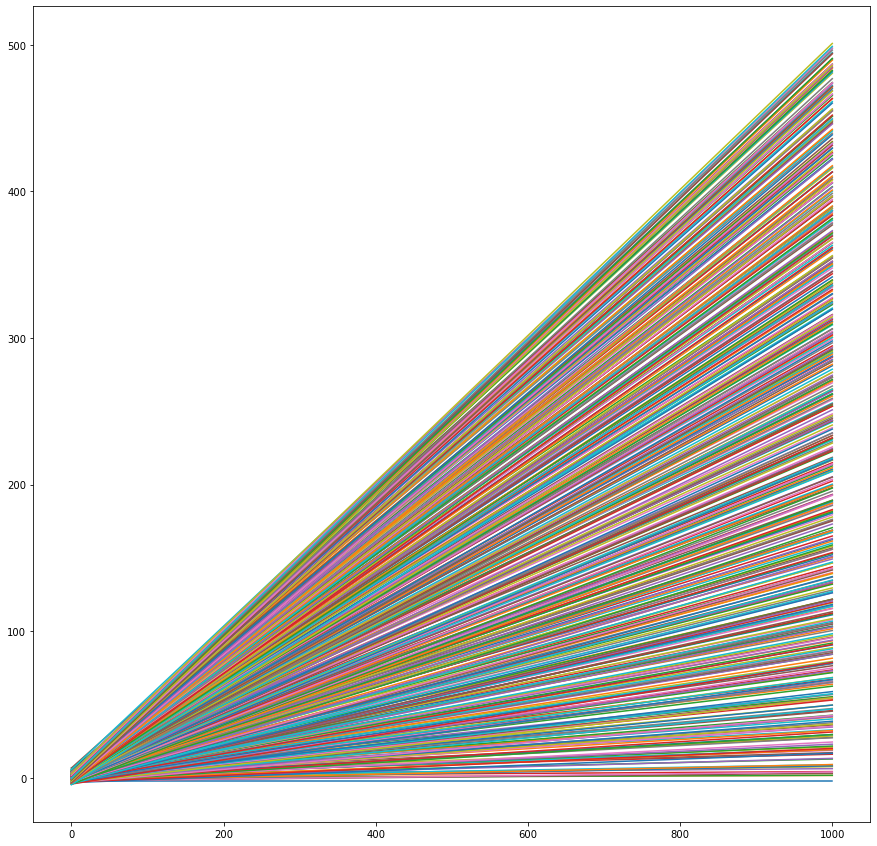

In [102]:
plt.figure(figsize=(15,15))
plt.plot(X);

In [36]:
n_component = X.shape[1]

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [99]:
preprocessor = make_pipeline(StandardScaler(),PCA(n_components = 0.99,random_state=0))

In [100]:
X_train_pca = preprocessor.fit_transform(X_train,y_train)
X_test_pca = preprocessor.transform(X_test)
X_train_pca.shape


(800, 1)

<IPython.core.display.Javascript object>


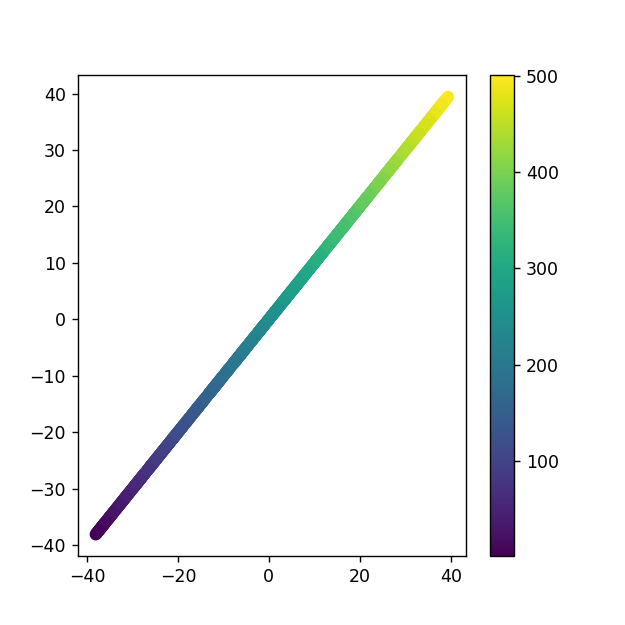

<IPython.core.display.Javascript object>


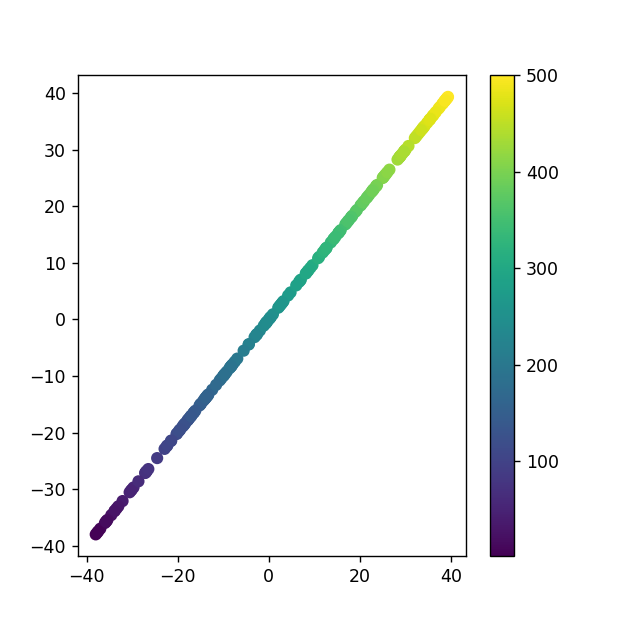

In [105]:
plt.figure(figsize=(5,5))
CompInit = 0
CompFinal = 0
plt.scatter(X_train_pca[:,CompInit],X_train_pca[:,CompFinal],c = y_train);
plt.colorbar();
plt.figure(figsize=(5,5))
plt.scatter(X_test_pca[:,CompInit],X_test_pca[:,CompFinal],c=y_test)
plt.colorbar()

In [107]:
import xgboost as xgb
model = xgb.XGBRegressor()

In [108]:
model.fit(X_train_pca,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [110]:
model.score(X_test_pca,y_test)

0.9999767589192755

In [115]:
X_measure = scio.loadmat(r"measLinearSlope.mat")['x']
X_measure

array([[ -1.92014911,   1.29545549,   0.99436374,   3.12216278,
          4.7154201 ,   1.16272182,   1.66075128,   5.11429555,
          4.56076875,   5.42849747,   4.23187179,   4.70612887,
          8.09719202,  10.9241929 ,   7.71116845,  11.2208398 ,
         12.3442237 ,  12.34909638,  13.83823235,  12.12326126,
          8.77751444,  10.95876242,  12.89748066,  10.90300154,
         13.35879034,  17.5568937 ,  14.04685408,  16.61405967,
         17.37096685,  21.09919353,  17.50535344,  19.90002185,
         16.74690339,  18.05561655,  21.06329917,  22.05920563,
         20.6664647 ,  22.76056821,  21.46593601,  24.56019823,
         22.60730484,  25.11489832,  25.91742579,  28.67866204,
         24.19429247,  27.44101748,  24.16098591,  28.46776628,
         30.38302228,  27.28033459,  29.6047111 ,  33.07253484,
         34.52717886,  31.8199983 ,  35.3878521 ,  32.69939447,
         31.86892958,  34.00941832,  31.33219852,  33.76519126,
         34.77555277,  39.3751564 ,  37.

In [116]:
X_measure_pca = preprocessor.transform(X_measure)

[298.81937]


<IPython.core.display.Javascript object>


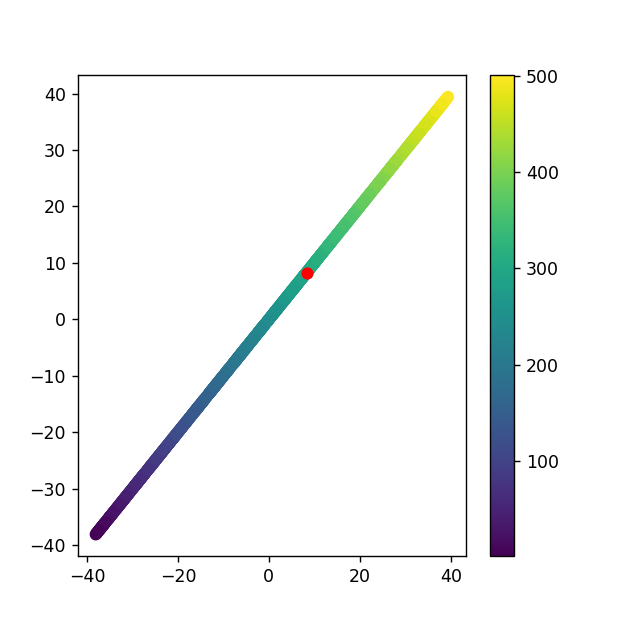

In [125]:
y_predicted = model.predict(X_measure_pca)
print(y_predicted)
plt.figure(figsize=(5,5))
plt.scatter(X_train_pca[:,CompInit],X_train_pca[:,CompFinal],c=y_train)
plt.colorbar()
plt.scatter(X_measure_pca[:,CompInit],X_measure_pca[:,CompFinal],c='r')